In [ ]:
!pip install transformers
!pip install simpletransformers

     |████████████████████████████████| 2.6 MB 8.7 MB/s 
     |████████████████████████████████| 636 kB 66.0 MB/s 
     |████████████████████████████████| 3.3 MB 59.8 MB/s 
     |████████████████████████████████| 895 kB 63.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 221 kB 8.3 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 8.0 MB 55.2 MB/s 
     |████████████████████████████████| 264 kB 70.8 MB/s 
     |████████████████████████████████| 124 kB 70.5 MB/s 
     |████████████████████████████████| 1.8 MB 60.4 MB/s 
     |████████████████████████████████| 1.2 MB 68.3 MB/s 
     |████████████████████████████████| 76 kB 5.4 MB/s 
     |████████████████████████████████| 170 kB 64.2 MB/s 
     |████████████████████████████████| 133 kB 70.6 MB/s 
     |████████████████████████████████| 97 kB

In [ ]:
import numpy as np                                                   # Library for linear algebra and math utils
import pandas as pd                                                  # Dataframe library
import csv
import os
import re                                                             # library for regular expression operations
import string                                                         # for string operations

import nltk                                                           # Python library for NLP
from nltk.corpus import stopwords                                     # module for stop words that come with NLTK
from nltk.stem import PorterStemmer                                   # module for stemming
from nltk.tokenize import TweetTokenizer                              # module for tokenizing strings
import matplotlib.pyplot as plt                                       # library for visualization
from matplotlib import ticker
import seaborn as sns                                                 # library for visualization
import plotly.express as px                                           # library for visualization

from IPython.display import Image as im
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator        # module for WordCloud

from collections import Counter                                        # module for Counting

from sklearn.preprocessing import LabelEncoder                         #Module for converting Categorial Data to Numerical Data 
from sklearn.model_selection import train_test_split                   #Module for Splitting the Dataset into Train and Test
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB                          #Module for Multinomial NB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report  
from simpletransformers.classification import ClassificationModel       #Module for Simple Transformer Using pre-trained BERT 

from sklearn.svm import SVC                              

In [ ]:
!pwd

/content


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gender-classifier-DFE-791531.csv to gender-classifier-DFE-791531.csv


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#import os
#os.chdir('/content/drive/My Drive/Ryerson University Course Materials /Data Science and Analytics/Spring:Summer 2021/MRP Related/Codes')

In [1]:

#os.chdir('/content/')
#!pwd

In [ ]:
df = pd.read_csv("gender-classifier-DFE-791531.csv", encoding="latin1")

In [ ]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [ ]:
df.iloc[1].text

'\x89ÛÏIt felt like they were my friends and I was living the story with them\x89Û\x9d https://t.co/arngE0YHNO #retired #IAN1 https://t.co/CIzCANPQFz'

In [ ]:
df.shape

(20050, 26)

We chose the tweets who has the gender confidence more than 0.80

In [ ]:
df = df[df.gender.isin(["female", "male"]) & (df["gender:confidence"] > 0.80)][['text','gender']]

In [ ]:
#df = df[df.gender.isin(["female", "male"])][['text','gender']]

In [ ]:
#df_gender = df_gender[df_gender["gender"].isin(["male", "female"]) & (df_gender["gender:confidence"] > 0.99)][['text','gender']]

In [ ]:
df.shape

(10029, 2)

Remove empty tweets

In [ ]:
df = df[df['text'].notna()]

Rename the "gender" column to "lable"

In [ ]:
df = df[["text", "gender"]].rename(columns={"gender": "label"})

In [ ]:
df

,text,label
0,Robbie E Responds To Critics After Win Against...,male
1,ÛÏIt felt like they were my friends and I was...,male
3,Hi @JordanSpieth - Looking at the url - do you...,male
4,Watching Neighbours on Sky+ catching up with t...,female
5,"Ive seen people on the train with lamps, chair...",female
...,...,...
20045,"@lookupondeath ...Fine, and I'll drink tea too...",female
20046,Greg Hardy you a good player and all but don't...,male
20047,You can miss people and still never want to se...,male
20048,@bitemyapp i had noticed your tendency to pee ...,female


Convert the categorial label to numeerical

In [ ]:
df['label'] = df['label'].replace({"female": 0, "male": 1})

We do the preprocessing steps here (Remove emojies, Stop words,Stemming,URLs and Hash tags , Usernames)


In [ ]:
# download the stopwords from NLTK
nltk.download('stopwords')
stopwords_english = stopwords.words('english') 
print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',

In [ ]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [ ]:
def preprocess_tweets(tweet):
    
    #change the tweet text to lower
    tweet = tweet.lower()
    
    # stop words in English
    stopwords_english = stopwords.words('english') 
    # remove URL
    tweet = re.sub('https?://\S+|www\.\S+', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', str(tweet))
    #remove Hashtags
    tweet = re.sub('#[A-Za-z0-9_]+','', tweet)
    #remove Username
    tweet = re.sub("@[A-Za-z0-9_]+","", tweet)
    #tweet = re.sub(r'#', '', tweet)
    #remove Numbers
    tweet = re.sub('\w*\d\w*', '', tweet)
    #tweet = re.sub(r'\d+', '', tweet)
    #remove all special characters 
    #tweet=re.sub('[^A-Za-z0-9]+', ' ', tweet)
    #remove Emojies
    tweet = remove_emojis(str(tweet))
    #remove \n 
    tweet = re.sub('\n', '', tweet)
     
    
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet) 
    
    tweets_clean = []
    for word in tweet_tokens:
        #print(word)
        if (word not in stopwords_english and  # remove stopwords
            word not in string.punctuation):  # remove punctuation
            tweets_clean.append(word)

    return tweets_clean

In [ ]:
def steming_tweet(tweet_tokens):
    stemmer = PorterStemmer()
    tweets_clean = []
    for word in tweet_tokens.split():
           stem_word = stemmer.stem(word)  # stemming word
           tweets_clean.append(stem_word)        
    return tweets_clean

We apply preprocess_tweets function on our tweets

In [ ]:
df['text'] = df['text'].apply(lambda x: preprocess_tweets(str(x)))

Convert the tokenized Tweets to sentence

In [ ]:
df['text'] = df['text'].apply(lambda x:' '.join([item for item in x])) 

We do stemming in this part

In [ ]:
df['text'] = df['text'].apply(lambda x: steming_tweet(x))

Again convert the tokenized tweets into sentence

In [ ]:
df['text'] = df['text'].apply(lambda x:' '.join([item for item in x])) 

In [ ]:
df['text']

0                   robbi e respond critic win eddi edward
1                  ûïit felt like friend live stori  û 
3                    hi look url use typic see advanc user
4        watch neighbour sky catch neighb xxx _ù ÷ ä_ù ...
5                   ive seen peopl train lamp chair tv etc
                               ...                        
20045                         ... fine i'll drink tea love
20046    greg hardi good player get face dez bryant lea...
20047                      miss peopl still never want see
20048           notic tendenc pee carpet want say anyth :p
20049    think apush creativ project i'm go bring bacon...
Name: text, Length: 10029, dtype: object

In [ ]:

# Find the maximum length of tweet
max_len = max([len(sent) for sent in df['text']])
print('Max length: ', max_len)

Max length:  593


The number of male and female genders in tweet

In [ ]:
df.label.value_counts()

0    5371
1    4658
Name: label, dtype: int64

In [ ]:
df = df[df['text'].notna()]

Here we split the main dataframe into train and test

In [ ]:
train_df, eval_df = train_test_split(df)

In [ ]:
train_df.shape, eval_df.shape

((7521, 2), (2508, 2))

At this section we call several pre-trained BERT models by Hugging Face with Simple Transformer library

In [ ]:
model_BERT = ClassificationModel("bert","bert-base-uncased")



Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
 #model = ClassificationModel('roberta', 'roberta-base' ,args=model_args)
 #model_args = {"learning_rate":1e-9 }
 #,"train_batch_size":16 , "adam_epsilon":4e-8 , "eval_batch_size":16 ,"learning_rate":1e-6 ,"adam_epsilon":4e-6  
 #,"eval_batch_size":16 ,"learning_rate":1e-6,"train_batch_size":16
 #"learning_rate" = 2e-5 "train_batch_size":16 ,"learning_rate" : 2e-6 ,"train_batch_size":16

In [ ]:
model_BERT.train_model(train_df, args={"num_train_epochs": 5 , "overwrite_output_dir": True})


/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:616: UserWarning:

Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.



  0%|          | 0/7521 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/941 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:942: FutureWarning:

Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.



Running Epoch 1 of 5:   0%|          | 0/941 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/941 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/941 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/941 [00:00<?, ?it/s]

(4705, 0.5059211345838817)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score ,classification_report
 
def f1_multiclass(labels, preds):
     return f1_score(labels, preds, average='micro')

In [ ]:
result_BERT, model_BERT_outputs, wrong_predictions = model_BERT.eval_model(eval_df ,f1=f1_score, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning:

Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.



  0%|          | 0/2508 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/314 [00:00<?, ?it/s]

In [ ]:
result_BERT

{'acc': 0.6128389154704944,
 'auprc': 0.5640662568179315,
 'auroc': 0.6292525716955606,
 'eval_loss': 1.619070300630703,
 'f1': 0.5663242518981689,
 'fn': 500,
 'fp': 471,
 'mcc': 0.2168316177917616,
 'tn': 903,
 'tp': 634}

In [ ]:
model_Roberta = ClassificationModel('roberta', 'roberta-base')

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
model_Roberta.train_model(train_df, args={"num_train_epochs": 5 , "overwrite_output_dir": True})

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:616: UserWarning:

Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.



  0%|          | 0/7521 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/941 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:942: FutureWarning:

Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.



Running Epoch 1 of 5:   0%|          | 0/941 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/941 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/941 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/941 [00:00<?, ?it/s]

(4705, 0.6760221256333128)

In [ ]:
result_Roberta, model_Roberta_outputs, wrong_predictions = model_Roberta.eval_model(eval_df ,f1=f1_score, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning:

Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.



  0%|          | 0/2508 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/314 [00:00<?, ?it/s]

In [ ]:
result_Roberta

{'acc': 0.6056618819776715,
 'auprc': 0.5908075118528464,
 'auroc': 0.6409349496443141,
 'eval_loss': 0.6726260337100667,
 'f1': 0.5610297381269418,
 'fn': 502,
 'fp': 487,
 'mcc': 0.20312911435716724,
 'tn': 887,
 'tp': 632}

In [ ]:
model_DistilBERT = ClassificationModel('distilbert','distilbert-base-uncased')

Downloading:   0%|          | 0.00/442 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'pre_classifier.weight', 'classi

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [ ]:
model_DistilBERT.train_model(train_df, args={"num_train_epochs": 5 , "overwrite_output_dir": True})

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:616: UserWarning:

Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.



  0%|          | 0/7521 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/941 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:942: FutureWarning:

Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.



Running Epoch 1 of 5:   0%|          | 0/941 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/941 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/941 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/941 [00:00<?, ?it/s]

(4705, 0.437192469018172)

In [ ]:
result_DistilBERT, model_DistilBERT_outputs, wrong_predictions   = model_DistilBERT.eval_model(eval_df ,f1=f1_score, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning:

Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.



  0%|          | 0/2508 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/314 [00:00<?, ?it/s]

In [ ]:
result_DistilBERT

{'acc': 0.6180223285486444,
 'auprc': 0.5875626233278284,
 'auroc': 0.6444543593680037,
 'eval_loss': 1.720260266285793,
 'f1': 0.5888412017167383,
 'fn': 472,
 'fp': 486,
 'mcc': 0.23221568123602018,
 'tn': 864,
 'tp': 686}

In [ ]:
#print("Accuracy :",(result['tp']+result['tn'])/(result['tp']+result['tn']+result['fn']+result['fp']))

0.6067864271457086

Here we try to predict the gender of our clean tweet dataset


In [ ]:
uploaded = files.upload()

Saving clean_tweets_sentiment.csv to clean_tweets_sentiment.csv


In [ ]:
sentiment_df = pd.read_csv("clean_tweets_sentiment.csv" ,encoding='utf-8')

In [ ]:
sentiment_df

,Unnamed: 0,text,vaderSentiment
0,0,smell scent hand sanit someon past would think...,Positive
1,1,made sens player pay respect,Positive
2,2,trump never claim claim effort,Neutral
3,3,gift give appreci simpl thing alway around,Positive
4,4,juli media bulletin novel,Positive
...,...,...,...
179103,179103,thank nomin challeng nomin,Positive
179104,179104,year insan lol,Positive
179105,179105,power paint grandpar die grandc,Negative
179106,179106,student test posit major univers abc news,Neutral


remove the first column of the sentiment_df

In [ ]:
sentiment_df.pop('Unnamed: 0')
#sentiment_df.pop('gender')

0              0
1              1
2              2
3              3
4              4
           ...  
179103    179103
179104    179104
179105    179105
179106    179106
179107    179107
Name: Unnamed: 0, Length: 179108, dtype: int64

We should remove the tweets which does not have any text in it otherwise we will get error when using predict function

In [ ]:
sentiment_df = sentiment_df[sentiment_df['text'].notna()]

In [ ]:
#Convert CSV into tsv file
#sentiment_df.to_csv("gender_prediction.tsv", sep="\t")

In [ ]:
tweet_text =[]
tweet_text = sentiment_df['text'].values.tolist()

At this part we predict the gender of each tweets based on our trained model

In [ ]:
gender_predicted_BERT , raw_output = model_DistilBERT.predict(tweet_text)

  0%|          | 0/177819 [00:00<?, ?it/s]

  0%|          | 0/22228 [00:00<?, ?it/s]

In [ ]:
gender_predicted_BERT.shape

(177819,)

In [ ]:
 sentiment_df.shape

(177819, 2)

In [2]:
#sentiment_df.pop('gender')

Put the predicted gender in a new gender column in sentiment_df

In [ ]:
new_dataframe = sentiment_df.assign(gender = gender_predicted_BERT)

In [ ]:
new_dataframe.shape

(177819, 3)

convert 0 to female and 1 to male in gender column

In [ ]:
new_dataframe['gender'].replace({0: "female", 1: "male"}, inplace=True)

In [ ]:
new_dataframe.groupby(['gender']).count()

,text,vaderSentiment
gender,,
female,75562,75562
male,102257,102257


In [ ]:
plt.figure(figsize=(5,5))
new_dataframe.groupby(['vaderSentiment','gender']).count()

text
vaderSentiment gender       
Negative       female  19352
               male    25656
Neutral        female  32420
               male    45583
Positive       female  23790
               male    31018

<Figure size 360x360 with 0 Axes>

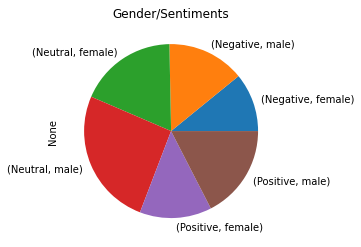

In [ ]:
new_dataframe.pivot_table(columns=['vaderSentiment','gender'],aggfunc='size').plot(kind='pie',title='Gender/Sentiments')